# 2.5 Jakość podziału: entropia

Kolejną możliwością, jeśli chodzi o pomiar jakości podziału w tworzonym drzewie, jest entropia. W swoim założeniu mierzy ona ilość informacji niesionej przez daną wiadomość.

Jeśli prawdopodobieństwo wystąpienia danej wiadomości wynosi 1, czyli jest to zdarzenie pewne, to jego wartość entropii wynosi 0, ponieważ ten fakt nie wnosi żadnej niespodziewanej informacji.

### Gini vs entropia
Obydwie wartości, do przeprowadzenia wyliczeń, korzystają z wartości proporcji które są wartościami z przedziału [0, 1]. Możemy więc wyrysować jak kształtują się wyrazy, które sumujemy by je wyliczyć, ze względu na wartości tych proporcji.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    "p": np.linspace(0, 1, 1000)
})
df["gini"] = df["p"] * (1 - df["p"])
df["entropy"] = - df["p"] * np.log2(df["p"])

/home/maciej/deep/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='p'>

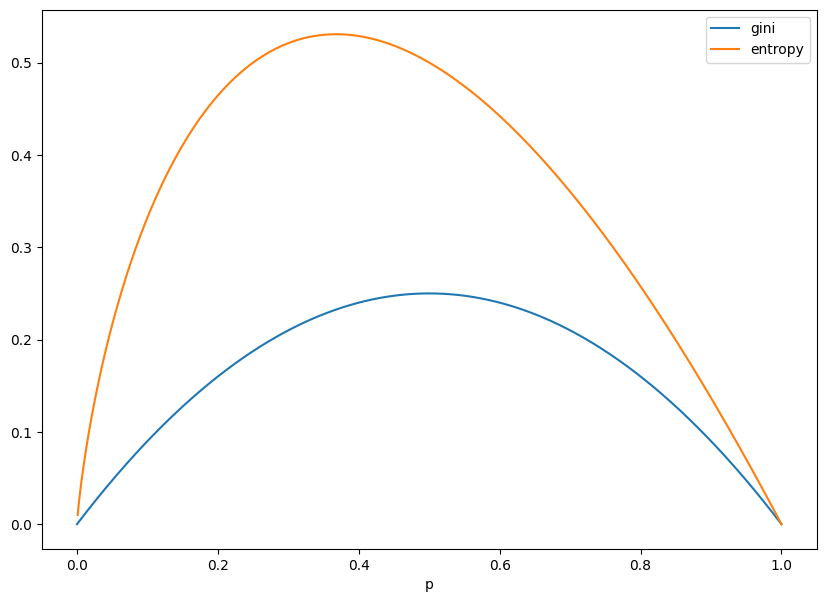

In [3]:
df.plot(x="p", figsize=(10, 7))

## Entropia w przypadku 2D

In [7]:
np.random.seed(135)

patients_df = pd.DataFrame({
    "dosage_mg": 10 * np.random.random(size=25)
})
recovered = (3.7 < patients_df["dosage_mg"]) & (patients_df["dosage_mg"] < 6.54)
patients_df["recovered"] = recovered.astype(int)
patients_df.sample(5)

,dosage_mg,recovered
10,3.733196,1
14,0.330930,0
22,3.186789,0
13,1.740597,0
2,1.953982,0


<Axes: xlabel='dosage_mg', ylabel='recovered'>

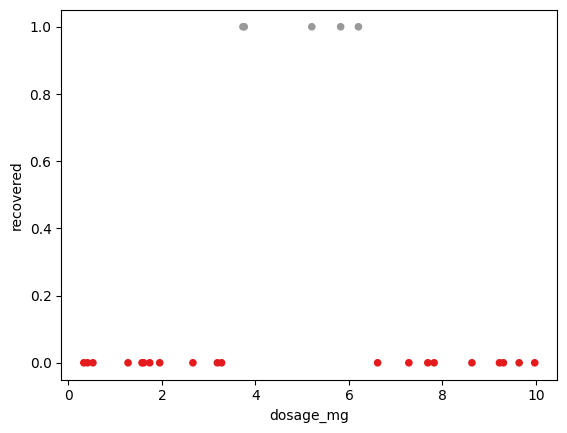

In [10]:
patients_df.plot.scatter(x="dosage_mg", y="recovered", c="recovered", cmap="Set1", colorbar=False)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(patients_df.drop(columns="recovered"), patients_df["recovered"])

DecisionTreeClassifier(criterion='entropy')

In [13]:
from sklearn.tree import export_text

In [14]:
print(export_text(dt))

|--- feature_0 <= 3.51
|   |--- class: 0
|--- feature_0 >  3.51
|   |--- feature_0 <= 6.41
|   |   |--- class: 1
|   |--- feature_0 >  6.41
|   |   |--- class: 0



### Impurity a rozpoznanie szumu
Zobaczmy jeszcze jak różne funkcje impurity poradzą sobie z rozpoznawaniem szumu. Wygenerujemy losowe zbiory danych i sprawdzimy czy stworzone drzewa tym razem będą się od siebie różnić.

<Axes: xlabel='x', ylabel='y'>

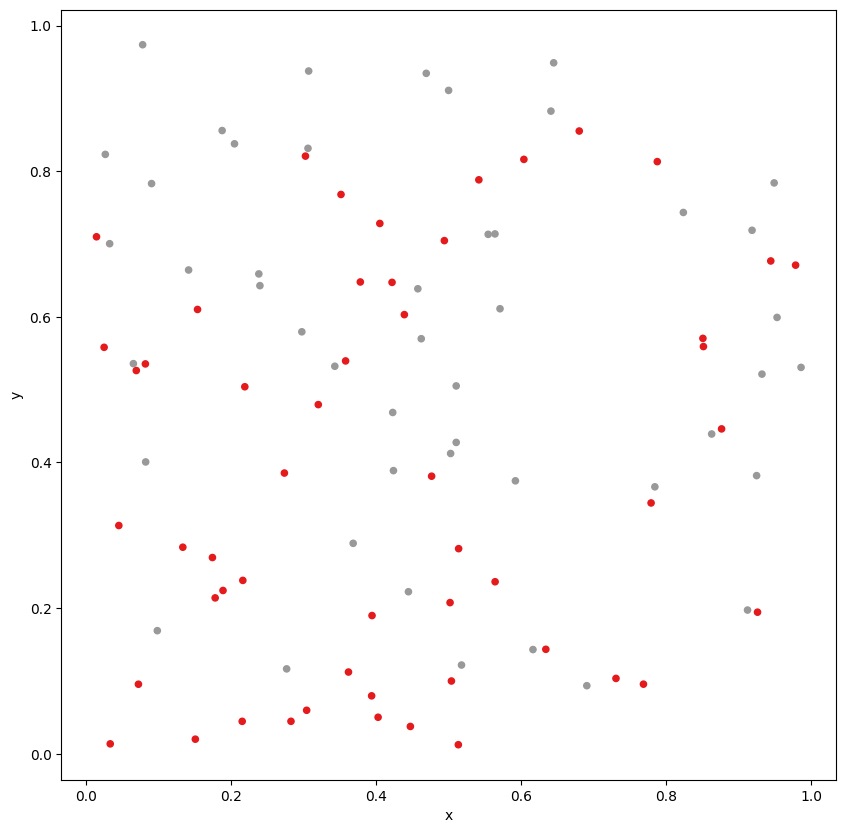

In [15]:
np.random.seed(974)

xy_df = pd.DataFrame({
    "x": np.random.random(size=100),
    "y": np.random.random(size=100),
    "class": np.random.choice([0,1], p=[.5, .5],
                              size=100),
})
xy_df.plot.scatter(x="x", y="y", c="class", cmap="Set1", figsize=(10,10), colorbar=False)

In [16]:
dt_gini = DecisionTreeClassifier(criterion="gini")
dt_gini.fit(xy_df.drop(columns="class"), xy_df["class"])
dt_gini.get_depth()

12

In [17]:
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(xy_df.drop(columns="class"), xy_df["class"])
dt_entropy.get_depth()

19

Wyrysujmy tym razem granice decyzyjne drzewa, ponieważ same zmienne nie mają większego sensu, a spodziewamy się dość dużej liczby rozgałęzień.

In [18]:
import matplotlib.pyplot as plt

In [20]:
from mlxtend.plotting import plot_decision_regions

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


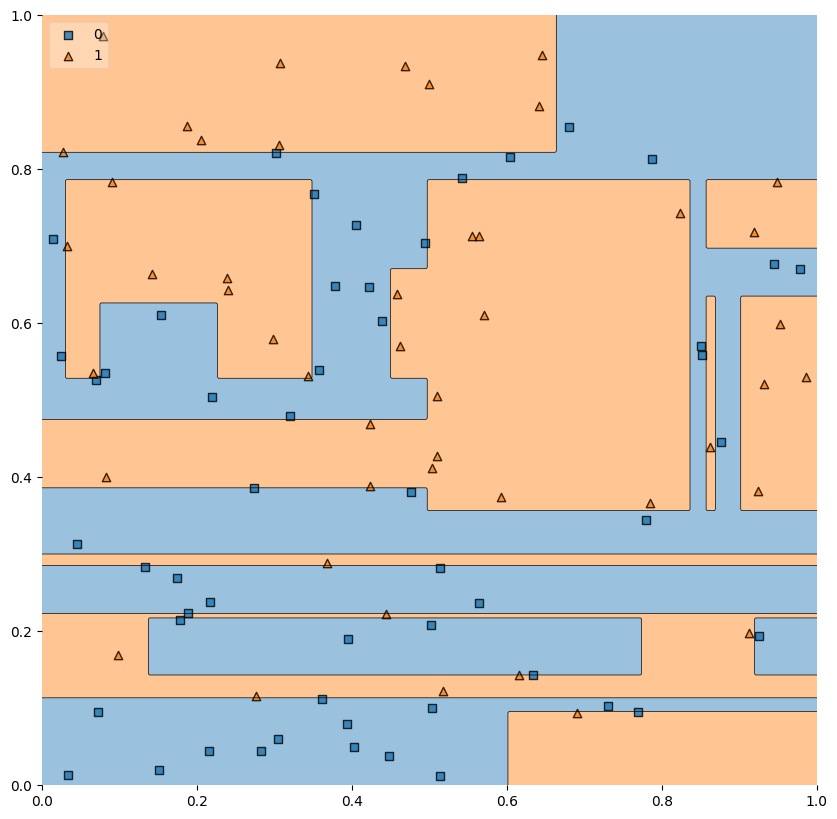

In [21]:
fig = plt.figure(figsize=(10, 10))
plot_decision_regions(xy_df.drop(columns="class").values, xy_df["class"].values, clf=dt_gini, legend=2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


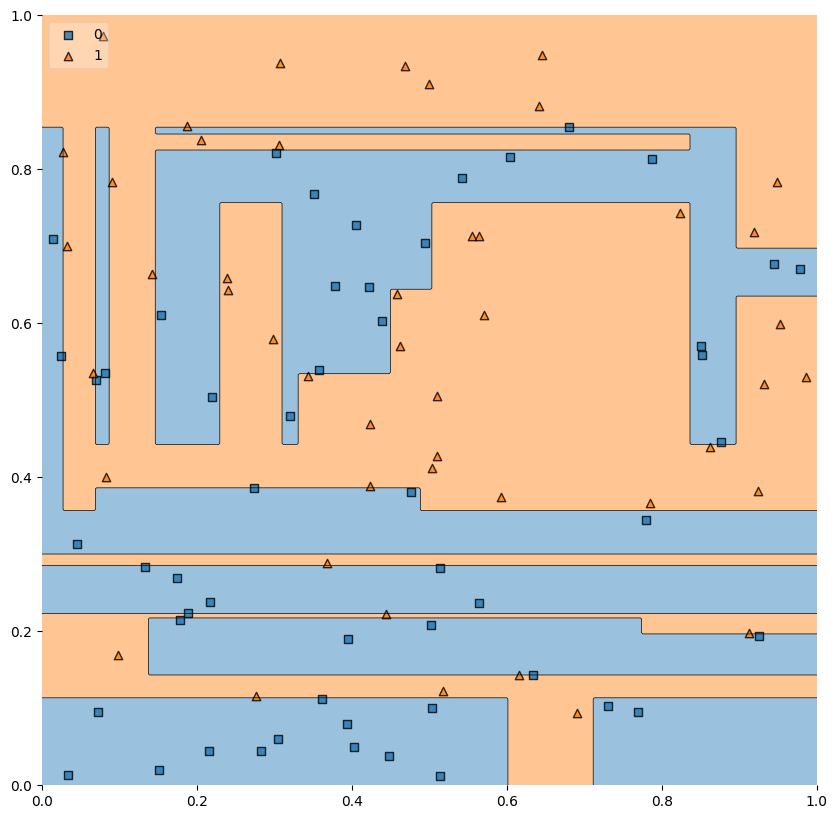

In [22]:
fig = plt.figure(figsize=(10, 10))
plot_decision_regions(xy_df.drop(columns="class").values, xy_df["class"].values, clf=dt_entropy, legend=2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Co lepsze: Gini czy entropia?
Prawdopodobnie żaden, obydwa zostały przeuczone, a to dlatego, że próbowaliśmy zaklasyfikować szum, który nie powinien mieć żadnych regularności.